# Introduction

Mobile phones come in all sorts of prices, features, specifications and all. Price estimation and prediction is an important part of
consumer strategy. Deciding on the correct price of a product is very important for the market success of a product. A new product that
has to be launched, must have the correct price so that consumers find it appropriate to buy the product.

# Problem Statement

To predict the price range of a mobile phone. The data contains information regarding mobile phone features, specifications etc and their
price range. The various features and information can be used to predict the price range of a mobile phone.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Read data


In [2]:
df=pd.read_csv("C:/Users/HP/Documents/train_data.csv")

In [3]:
df

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,...,245,829,2319,5,4,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,...,188,928,3078,10,1,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,...,248,755,263,6,5,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,...,58,1253,2581,15,11,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,...,1442,1904,1958,7,5,2,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,1100,1,1.6,0,12,0,15,0.1,112,...,919,1344,757,12,2,16,1,1,1,0
1396,1397,1358,0,2.5,1,0,0,20,0.6,135,...,1485,1655,3406,5,1,11,0,0,1,3
1397,1398,1034,1,2.7,1,6,0,37,0.7,120,...,707,1199,3625,17,1,12,0,1,1,3
1398,1399,703,1,2.7,0,12,1,30,0.3,113,...,218,1065,1472,14,7,7,1,0,0,0


In [4]:
df.head()

,id,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1,807,1,0.5,1,0,0,37,0.2,127,...,245,829,2319,5,4,4,0,0,0,1
1,2,1065,1,0.5,0,0,1,14,0.7,89,...,188,928,3078,10,1,18,1,0,1,2
2,3,1171,1,1.7,1,2,0,19,0.3,167,...,248,755,263,6,5,8,0,0,0,0
3,4,609,1,3.0,0,15,1,44,0.3,117,...,58,1253,2581,15,11,15,1,0,1,1
4,5,1193,1,2.3,0,7,0,20,1.0,158,...,1442,1904,1958,7,5,2,1,0,0,2


In [5]:
df.columns 

Index(['id', 'battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1400 non-null   int64  
 1   battery_power  1400 non-null   int64  
 2   bluetooth      1400 non-null   int64  
 3   clock_speed    1400 non-null   float64
 4   dual_sim       1400 non-null   int64  
 5   fc             1400 non-null   int64  
 6   four_g         1400 non-null   int64  
 7   int_memory     1400 non-null   int64  
 8   m_dep          1400 non-null   float64
 9   mobile_wt      1400 non-null   int64  
 10  n_cores        1400 non-null   int64  
 11  pc             1400 non-null   int64  
 12  px_height      1400 non-null   int64  
 13  px_width       1400 non-null   int64  
 14  ram            1400 non-null   int64  
 15  sc_h           1400 non-null   int64  
 16  sc_w           1400 non-null   int64  
 17  talk_time      1400 non-null   int64  
 18  three_g 

In [7]:
df.shape

(1400, 22)

In [8]:
df.price_range.value_counts()  #target column

1    350
2    350
0    350
3    350
Name: price_range, dtype: int64

In [9]:
df.nunique() #it gives unique values

id               1400
battery_power     919
bluetooth           2
clock_speed        26
dual_sim            2
fc                 19
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height         930
px_width          917
ram              1166
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# Cleaning Part

In [10]:
mob_data=df.drop(['id'], axis=1)
mob_data.head()

,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,807,1,0.5,1,0,0,37,0.2,127,4,...,245,829,2319,5,4,4,0,0,0,1
1,1065,1,0.5,0,0,1,14,0.7,89,2,...,188,928,3078,10,1,18,1,0,1,2
2,1171,1,1.7,1,2,0,19,0.3,167,7,...,248,755,263,6,5,8,0,0,0,0
3,609,1,3.0,0,15,1,44,0.3,117,1,...,58,1253,2581,15,11,15,1,0,1,1
4,1193,1,2.3,0,7,0,20,1.0,158,7,...,1442,1904,1958,7,5,2,1,0,0,2


# Missing Value Treatment

Missing values are usually represented in the form of Nan or null or None in the dataset.

In [11]:
mob_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1400 non-null   int64  
 1   bluetooth      1400 non-null   int64  
 2   clock_speed    1400 non-null   float64
 3   dual_sim       1400 non-null   int64  
 4   fc             1400 non-null   int64  
 5   four_g         1400 non-null   int64  
 6   int_memory     1400 non-null   int64  
 7   m_dep          1400 non-null   float64
 8   mobile_wt      1400 non-null   int64  
 9   n_cores        1400 non-null   int64  
 10  pc             1400 non-null   int64  
 11  px_height      1400 non-null   int64  
 12  px_width       1400 non-null   int64  
 13  ram            1400 non-null   int64  
 14  sc_h           1400 non-null   int64  
 15  sc_w           1400 non-null   int64  
 16  talk_time      1400 non-null   int64  
 17  three_g        1400 non-null   int64  
 18  touch_sc

In [12]:
mob_data.isnull().sum()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Data types Conversion

In [13]:
mob_data.dtypes

battery_power      int64
bluetooth          int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

# Exploratory Data Analysis(EDA)

In [14]:
mob_data.skew()

battery_power    0.036104
bluetooth        0.002860
clock_speed      0.169379
dual_sim        -0.022883
fc               1.046395
four_g          -0.062956
int_memory       0.064831
m_dep            0.069342
mobile_wt       -0.014623
n_cores         -0.013069
pc               0.029612
px_height        0.646208
px_width         0.037500
ram              0.020281
sc_h            -0.097112
sc_w             0.641357
talk_time       -0.007102
three_g         -1.196093
touch_screen    -0.014301
wifi            -0.048638
price_range      0.000000
dtype: float64

In [15]:
x=mob_data.corr()
x

,battery_power,bluetooth,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,-0.009722,0.013782,-0.038118,0.028987,0.013888,0.017102,0.035654,0.010051,-0.017711,...,-0.009281,-0.012174,0.002308,-0.021093,-0.014305,0.053070,0.001044,-0.011932,0.002977,0.199775
bluetooth,-0.009722,1.000000,0.048849,0.015732,-0.006819,-0.004243,0.026852,-0.014753,-0.012159,0.059273,...,-0.010394,-0.026192,0.021981,0.001132,0.006462,0.008109,-0.042413,0.020011,-0.008539,0.007028
clock_speed,0.013782,0.048849,1.000000,0.016023,-0.015817,-0.018427,0.001168,-0.001278,0.015822,0.003577,...,-0.007240,-0.009153,-0.018537,-0.041655,-0.003870,-0.000545,-0.036774,0.047538,-0.015943,-0.023609
dual_sim,-0.038118,0.015732,0.016023,1.000000,-0.014529,0.005358,-0.002839,-0.012519,-0.004204,-0.007845,...,0.001877,0.035297,0.054281,-0.005962,-0.025245,-0.025067,-0.021806,0.012777,0.024017,0.033224
fc,0.028987,-0.006819,-0.015817,-0.014529,1.000000,-0.024292,-0.032420,-0.014980,0.009810,-0.019162,...,0.005093,0.002306,0.003369,-0.016715,0.017254,-0.003747,0.006780,-0.015656,0.023149,0.006690
four_g,0.013888,-0.004243,-0.018427,0.005358,-0.024292,1.000000,0.021652,-0.046392,-0.003872,-0.054192,...,-0.006616,0.004212,-0.027073,0.036611,0.033876,-0.057975,0.585576,0.021215,-0.030788,-0.014062
int_memory,0.017102,0.026852,0.001168,-0.002839,-0.032420,0.021652,1.000000,0.003740,-0.064406,-0.015637,...,-0.022913,-0.027686,0.031367,0.037378,0.003192,-0.008424,0.001022,-0.012379,-0.001295,0.045100
m_dep,0.035654,-0.014753,-0.001278,-0.012519,-0.014980,-0.046392,0.003740,1.000000,0.023530,-0.001581,...,0.036436,0.031457,-0.010590,-0.018608,-0.017211,0.014483,-0.038137,-0.005053,-0.032952,0.004626
mobile_wt,0.010051,-0.012159,0.015822,-0.004204,0.009810,-0.003872,-0.064406,0.023530,1.000000,-0.015793,...,0.021290,-0.001010,-0.004049,-0.018891,-0.029113,-0.026996,0.010162,-0.014373,-0.002674,-0.036183
n_cores,-0.017711,0.059273,0.003577,-0.007845,-0.019162,-0.054192,-0.015637,-0.001581,-0.015793,1.000000,...,0.009769,0.049197,0.000596,-0.016691,0.015773,0.005371,-0.017946,0.041482,0.001509,0.005606


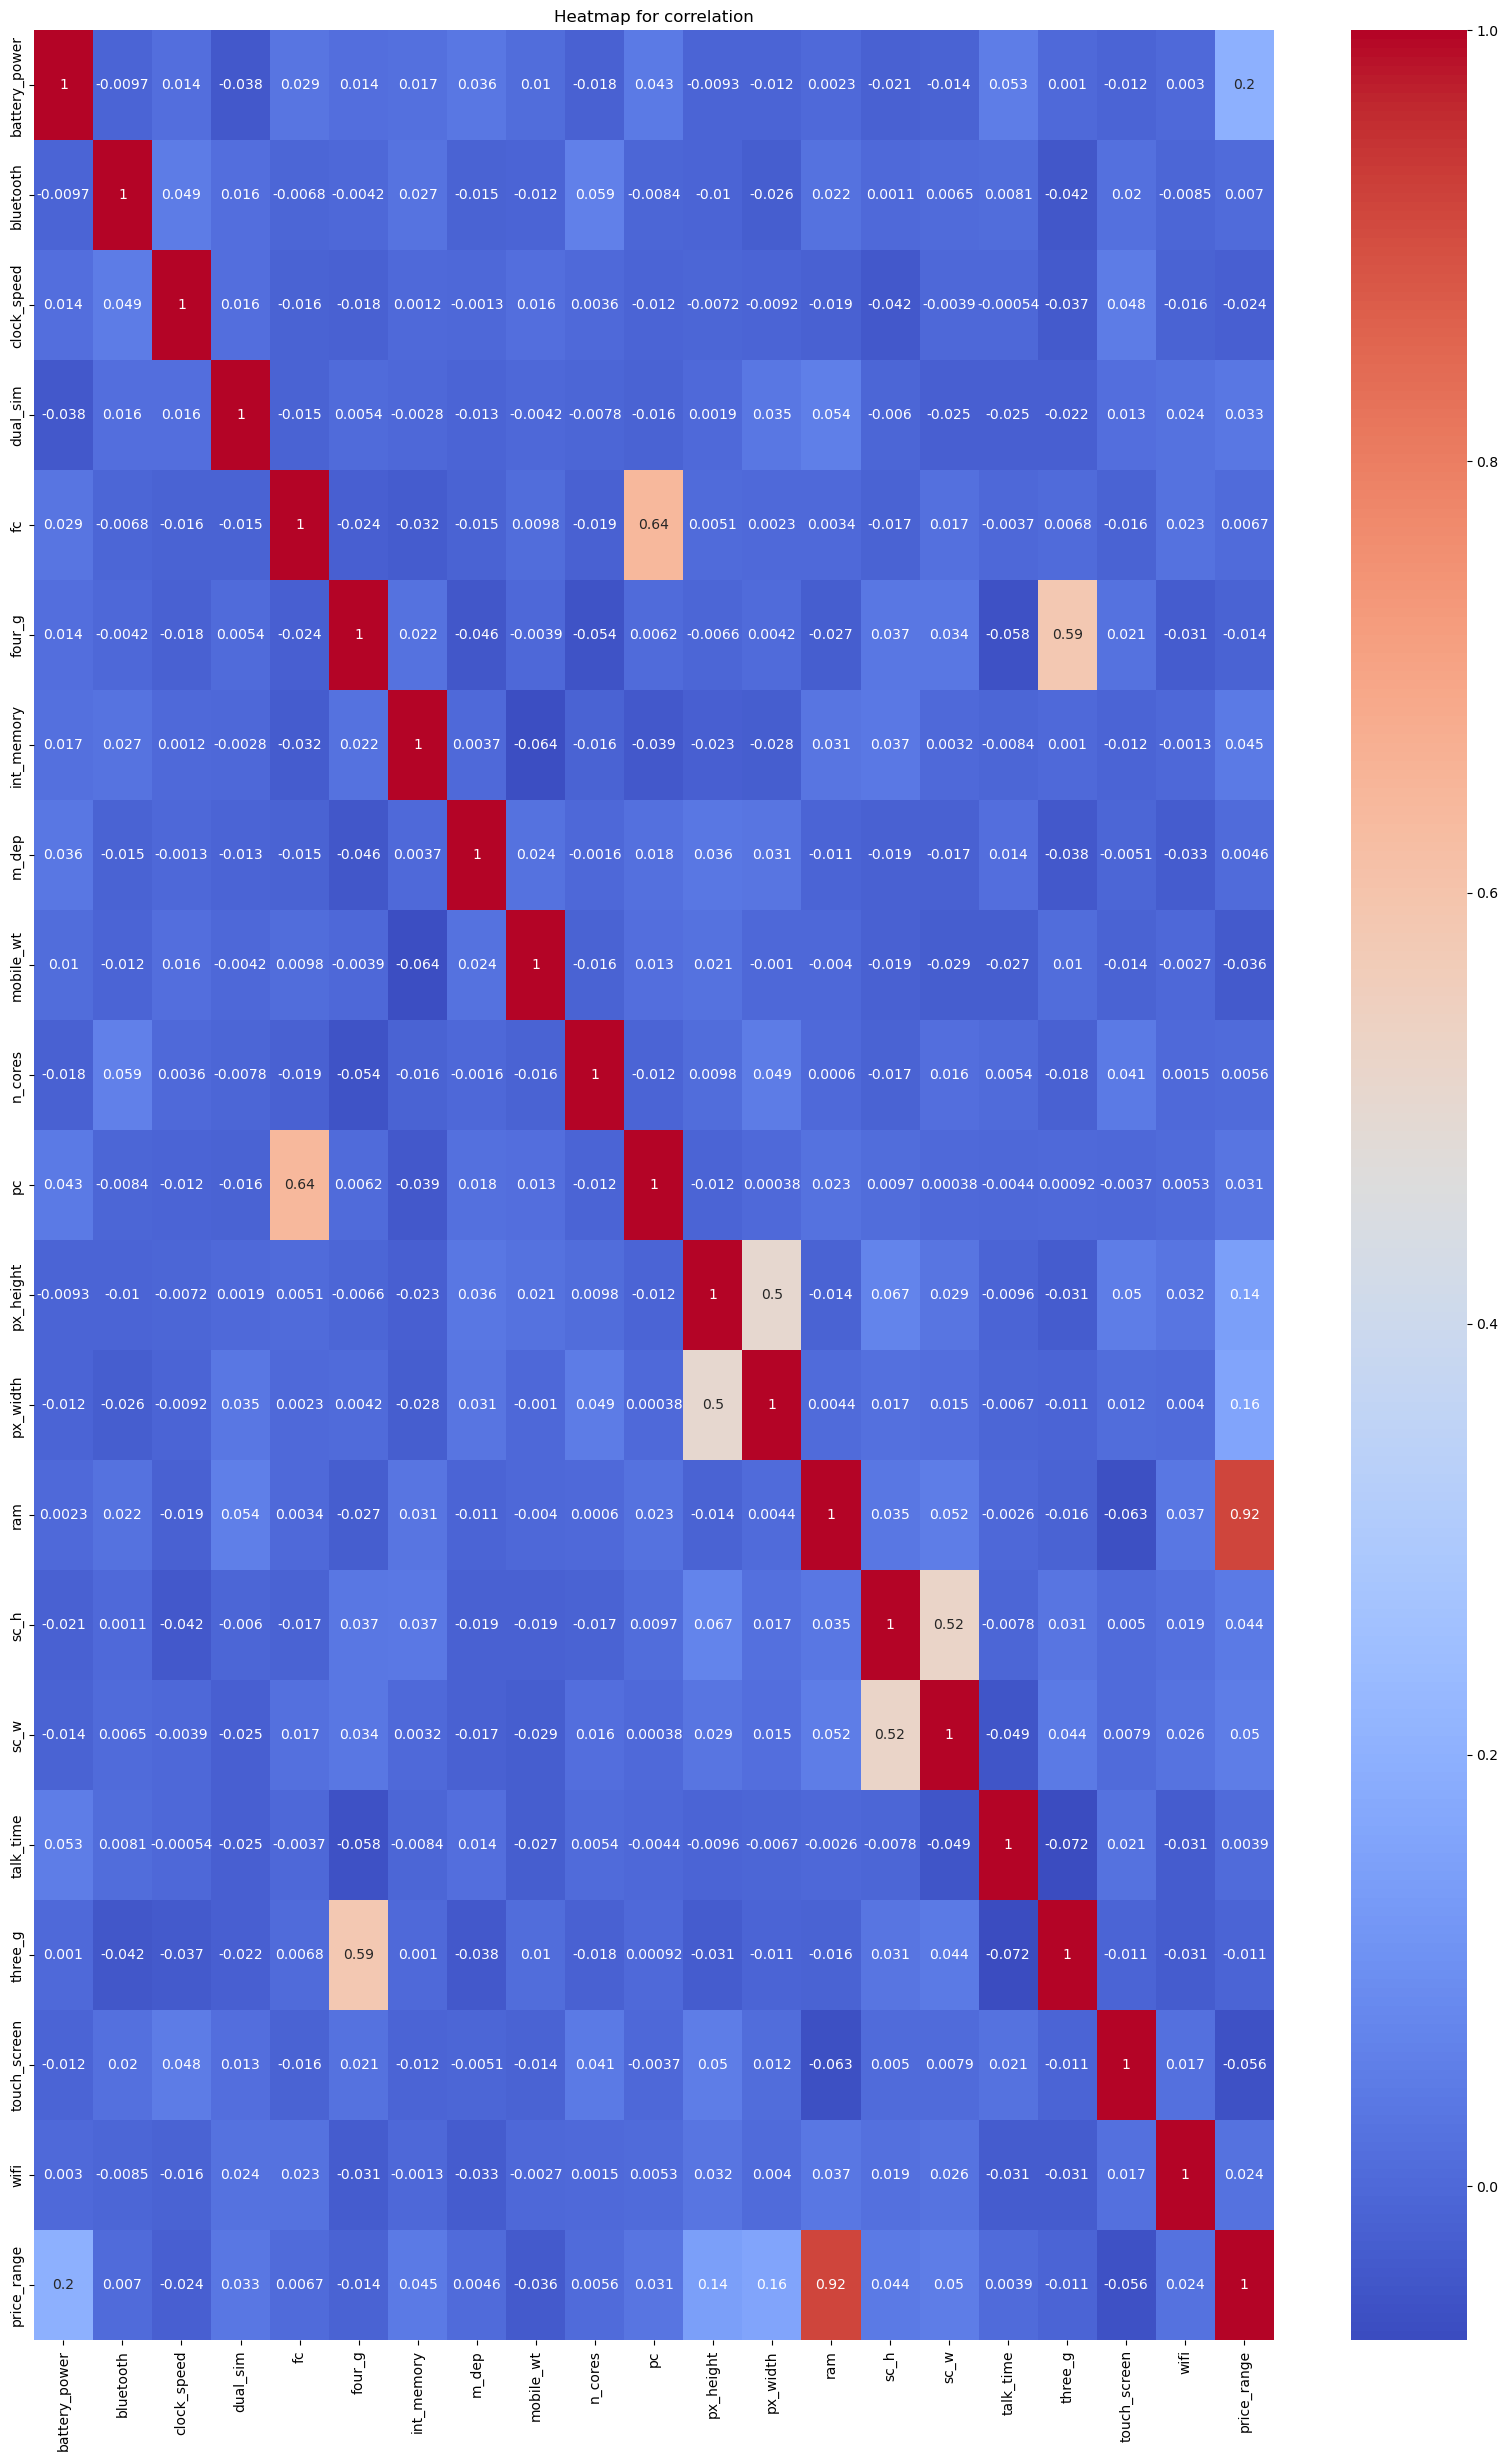

In [16]:
plt.figure(figsize=(20,30))
heatmap=sns.heatmap(x,cmap="coolwarm",annot=True)
plt.title("Heatmap for correlation")
plt.show()

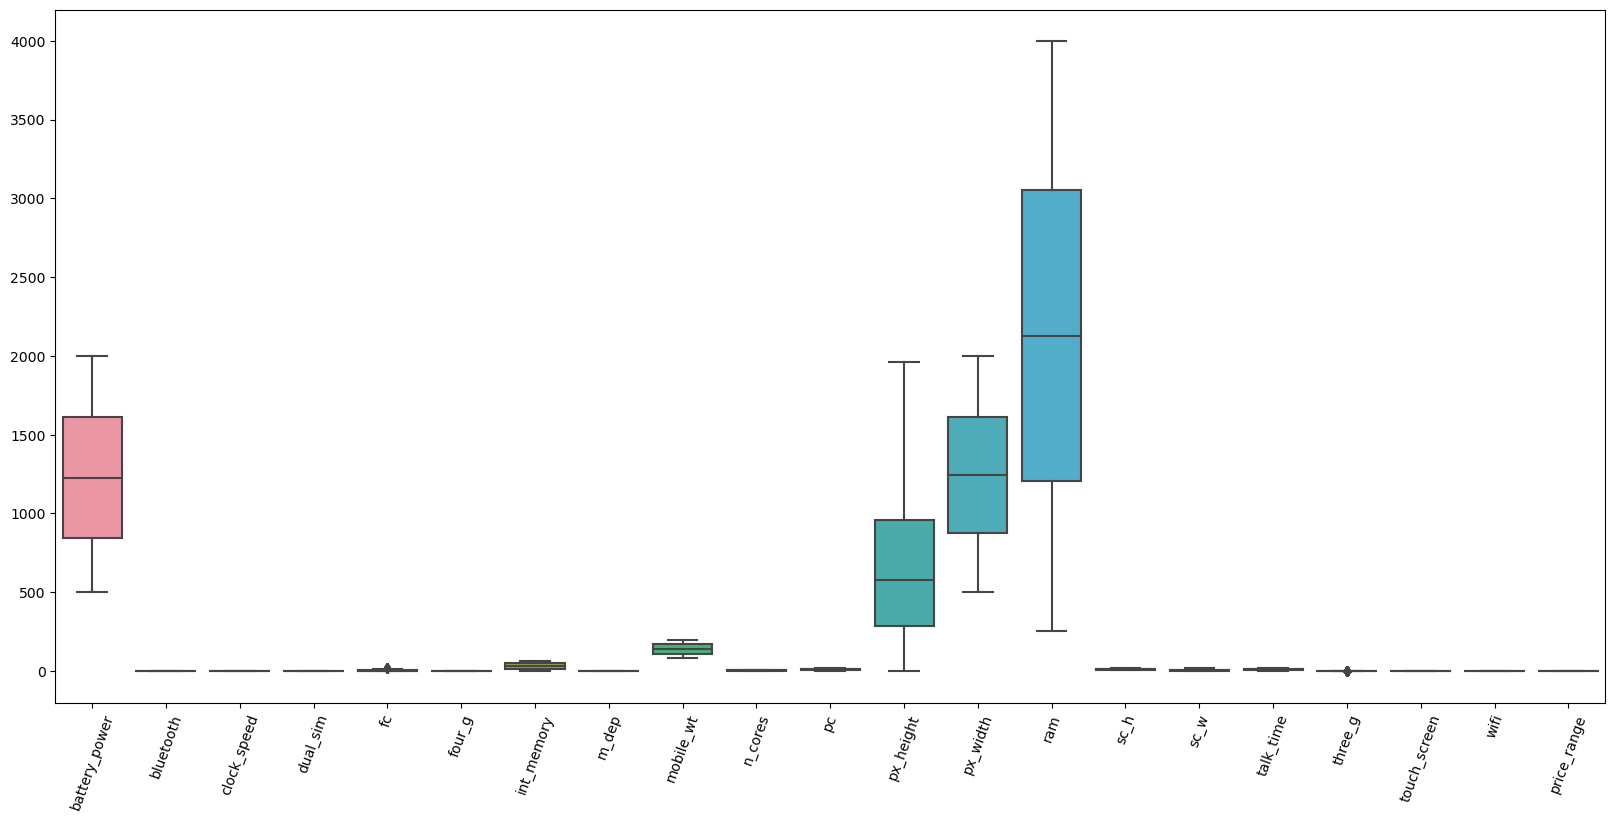

In [17]:
plt.figure(figsize=(20,9))
sns.boxplot(data=mob_data)
plt.xticks(rotation=70)
plt.show()

In [18]:
# using the IQR method we find outliers
data_numeric=mob_data.select_dtypes(include=[np.number])
q1=mob_data.quantile(0.25)
q3=mob_data.quantile(0.75)
iqr=q3-q1
lb=q1-1.5*iqr
ub=q3+1.5*iqr
outliers=data_numeric[(data_numeric<lb)|(data_numeric>ub)]

In [19]:
outliers.count()

battery_power      0
bluetooth          0
clock_speed        0
dual_sim           0
fc                10
four_g             0
int_memory         0
m_dep              0
mobile_wt          0
n_cores            0
pc                 0
px_height          0
px_width           0
ram                0
sc_h               0
sc_w               0
talk_time          0
three_g          341
touch_screen       0
wifi               0
price_range        0
dtype: int64

In [20]:
#using median we input the outliers
for col in data_numeric.columns:
    col_median=data_numeric[col].median()
    data_numeric.loc[data_numeric[col]<lb[col],col]=col_median
    data_numeric.loc[data_numeric[col]>ub[col],col]=col_median


In [21]:
outliers.ai=data_numeric[(data_numeric<lb)|(data_numeric>ub)]

In [22]:
outliers.ai.count()

battery_power    0
bluetooth        0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

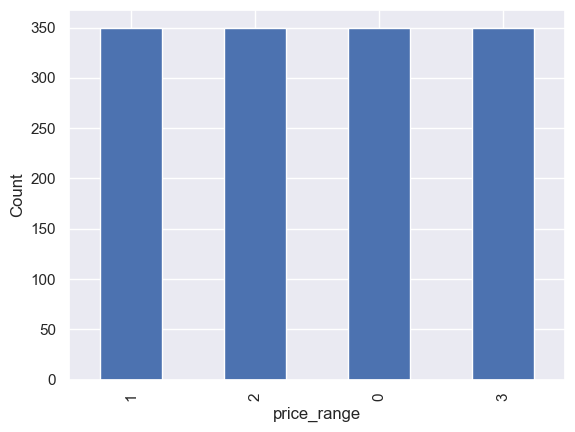

In [23]:
sns.set()
price_plot=mob_data['price_range'].value_counts().plot(kind='bar')
plt.xlabel('price_range')
plt.ylabel('Count')
plt.show()

So, there are mobile phones in 4 price ranges. The number of elements is almost similar.

# Data Distribution

First, we see how the battery_power mAh is spread.

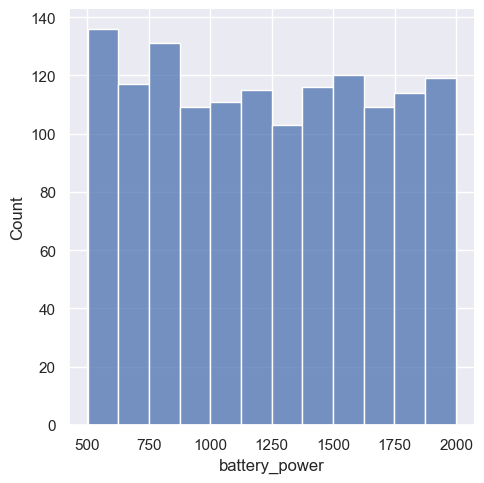

In [24]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mob_data["battery_power"])
plt.show()

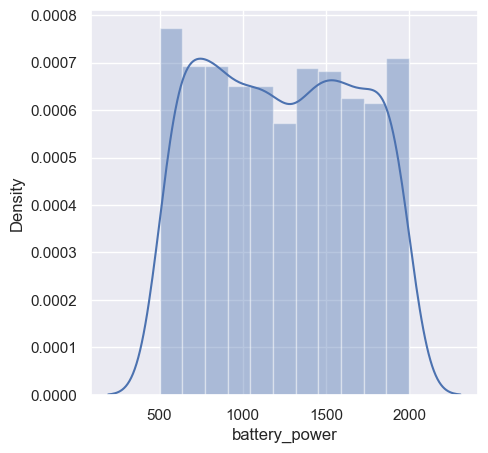

In [25]:
sns.distplot(mob_data.battery_power)
plt.show()


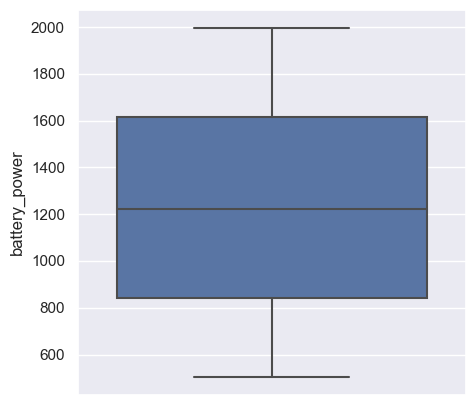

In [26]:
sns.boxplot(data=mob_data,y='battery_power')
plt.show()

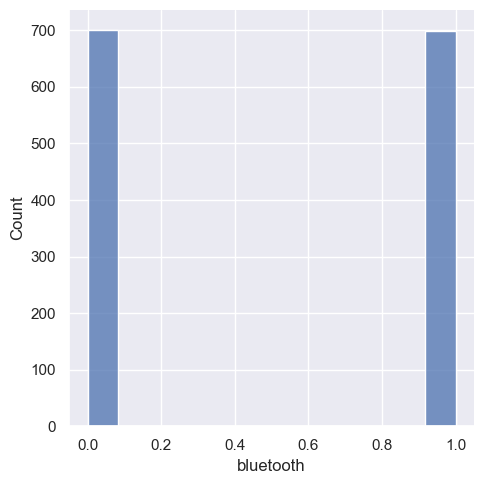

In [27]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mob_data["bluetooth"])
plt.show()

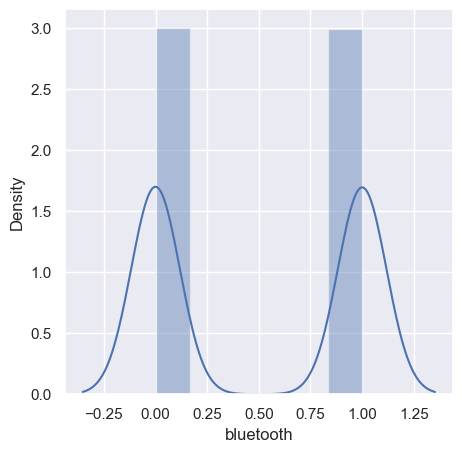

In [28]:
sns.distplot(mob_data.bluetooth)
plt.show()

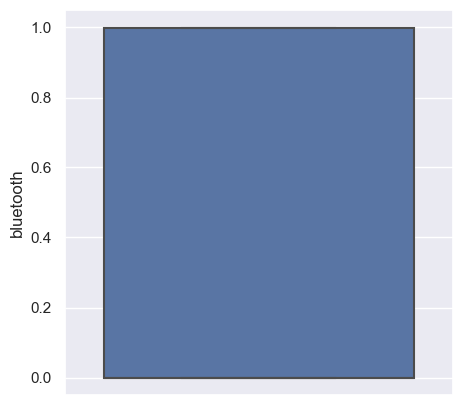

In [29]:
sns.boxplot(data=mob_data,y='bluetooth')
plt.show()

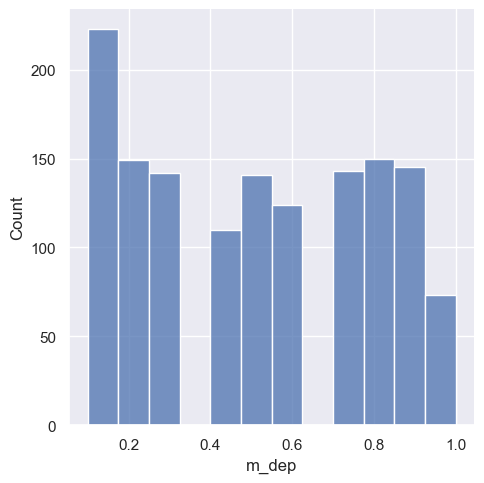

In [30]:
sns.set(rc={'figure.figsize':(5,5)})
ax=sns.displot(data=mob_data["m_dep"])
plt.show()

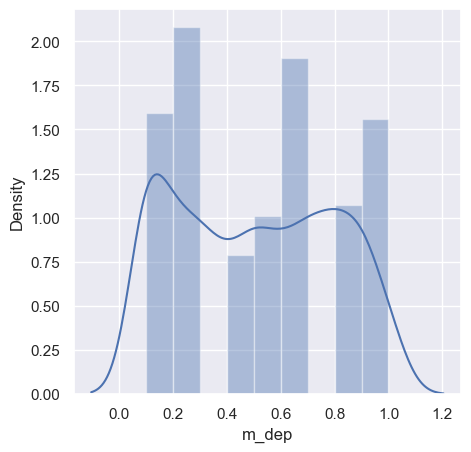

In [31]:
sns.distplot(mob_data.m_dep)
plt.show()

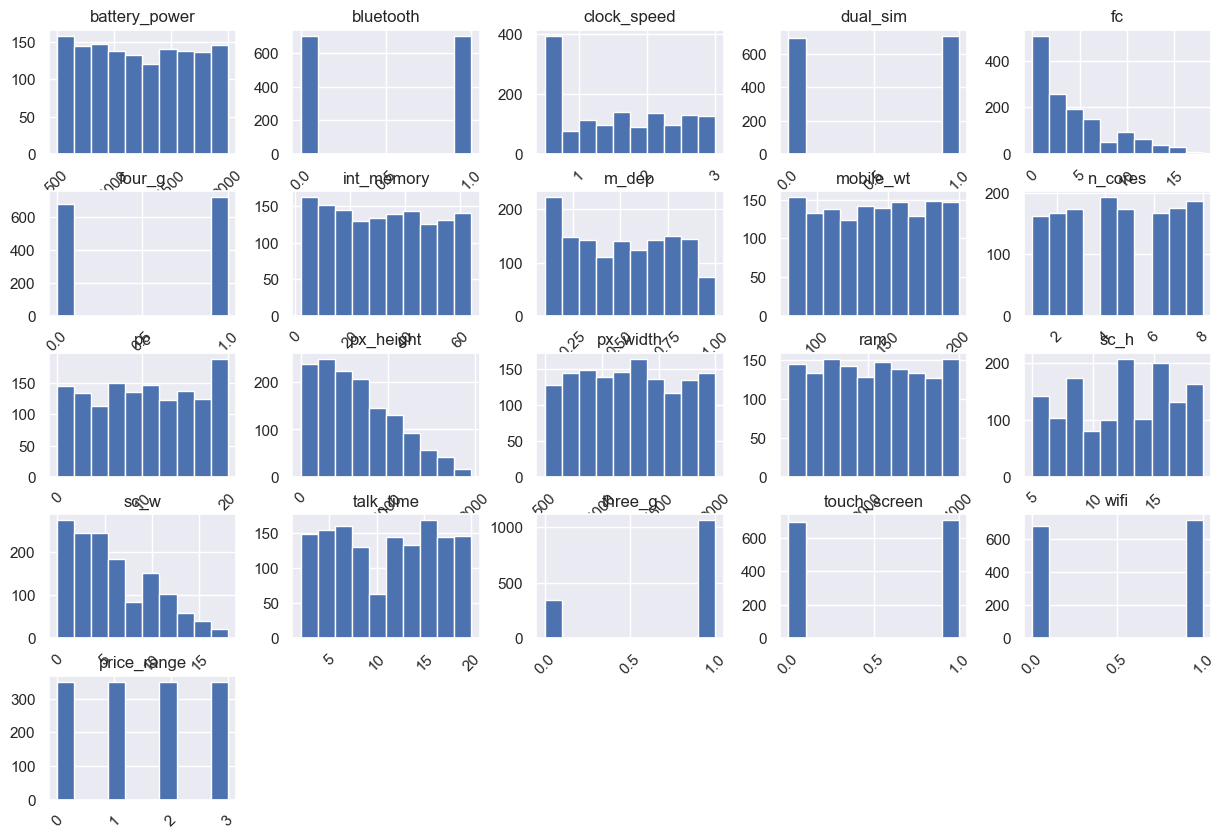

In [32]:
mob_data.hist(figsize=(15,10),xrot=45)
plt.xticks(rotation=70)
plt.show()

# Creating Base Model

In a similar way, the data distribution can be analysed for all the data features. Implementing that will be very simple. Let us see if there
are any missing values or missing data.

In [33]:
mob_data.shape

(1400, 21)

In [34]:
x=mob_data.drop(['price_range'], axis=1)
y=mob_data['price_range']
# missing values
x.isna().any()

battery_power    False
bluetooth        False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
dtype: bool

# Split the data

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.2,random_state=7)

Now, we define a function for creating confusion matrix.

In [36]:
#Function for confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# 1) Random Forest Classifier

A random forest is a supervised machine learning method built from decision tree techniques. This algorithm is used to anticipate
behaviour and results in a variety of sectors, including banking and e-commerce.A random forest is a machine learning approach for
solving regression and classification issues. It makes use of ensemble learning, which is a technique that combines multiple classifiers to
solve complicated problems. The Random Forest Algorithm based on Decision Tree Algorithm

In [37]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
max_depth= 7,
max_features= 15,
min_samples_leaf= 3,
min_samples_split= 10,
n_estimators= 200,
random_state=7)
rfc.fit(x_train, y_train)


RandomForestClassifier(max_depth=7, max_features=15, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200, random_state=7)

In [38]:
y_pred_rfc=rfc.predict(x_test)

Random Forest Classifier Accuracy Score:  0.8964285714285715
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        60
           1       0.87      0.87      0.87        75
           2       0.86      0.86      0.86        72
           3       0.93      0.95      0.94        73

    accuracy                           0.90       280
   macro avg       0.90      0.90      0.90       280
weighted avg       0.90      0.90      0.90       280



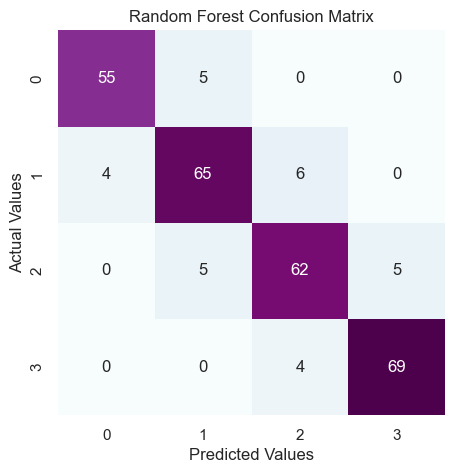

In [39]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rfc))
cm_rfc=my_confusion_matrix(y_test, y_pred_rfc, 'Random Forest Confusion Matrix')

# 2) SVM Classifier

Support Vector Machine, or SVM, is a prominent Supervised Learning technique that is used for both classification and regression
issues. However, it is mostly utilised in Machine Learning for Classification purposes.
The SVM algorithm’s purpose is to find the optimum line or decision boundary for categorising n-dimensional space so that we may
simply place fresh data points in the proper category in the future. A hyperplane is the optimal choice boundary.

In [40]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo')
svm_clf.fit(x_train, y_train)

SVC(decision_function_shape='ovo')

In [41]:
y_pred_svm=svm_clf.predict(x_test)

SVM Classifier Accuracy Score:  0.9357142857142857
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        60
           1       0.92      0.92      0.92        75
           2       0.97      0.88      0.92        72
           3       0.94      0.99      0.96        73

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280



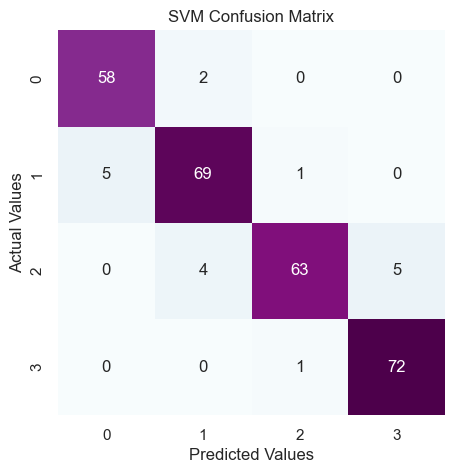

In [42]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_svm=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

We can see that the SVM classifier is giving the best accuracy.

# 3) Naive Bayes

Conditional probability is the foundation of Bayes’ theorem. The conditional probability aids us in assessing the likelihood of something
occurring if something else has previously occurred. Gaussian Naive Bayes is a Naive Bayes variation that allows continuous data and
follows the Gaussian normal distribution

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [44]:
y_pred_gnb=gnb.predict(x_test)

Gaussian NB Classifier Accuracy Score:  0.8357142857142857
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        60
           1       0.76      0.72      0.74        75
           2       0.73      0.78      0.75        72
           3       0.96      0.93      0.94        73

    accuracy                           0.84       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.84      0.84      0.84       280



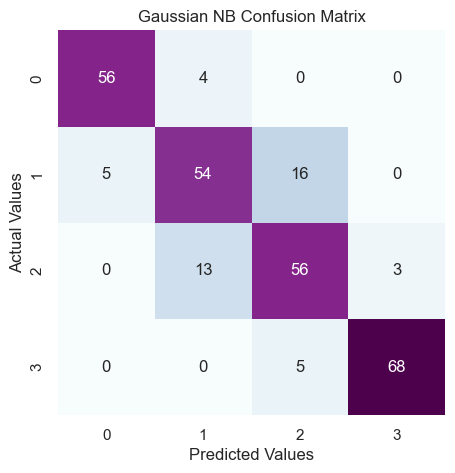

In [45]:
print('Gaussian NB Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_gnb))
cm_gnb=my_confusion_matrix(y_test, y_pred_gnb, 'Gaussian NB Confusion Matrix')

We can see that the model is performing wel

# 4) Decision Tree Classifier


The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an
attribute, each branch descending from that node corresponds to one of the possible values for that attribute.

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
y_pred_dtc = dtc.predict(x_test)

Decision Tree Classifier Accuracy Score:  0.8428571428571429
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        60
           1       0.85      0.75      0.79        75
           2       0.78      0.86      0.82        72
           3       0.90      0.89      0.90        73

    accuracy                           0.84       280
   macro avg       0.85      0.85      0.84       280
weighted avg       0.85      0.84      0.84       280



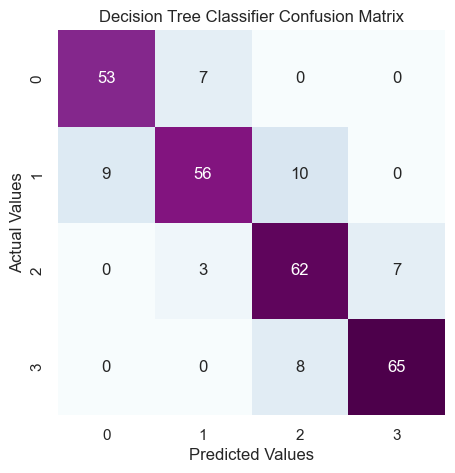

In [48]:
print('Decision Tree Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_dtc))
cm_dtc=my_confusion_matrix(y_test, y_pred_dtc, 'Decision Tree Classifier Confusion Matrix')

Comparing Accuracies of different algorithm

1.Accuracy of Decesion Tree Classifier : 0.8285

2.Accuracy of Naive bayes Classifier : 0.8357

3.Accuracy of Random Forest Classifier : 0.8964

4.Accuracy of Support Vector Classifier : 0.9357

# Conclusion


In this problem, we looked at classification. Classifiers represent the intersection of advanced machine theory and practical
application.These algorithms are more than just a sorting mechanism for organizing unlabeled data instances into distinct groupings.
Classifiers include a unique set of dynamic rules that include an interpretation mechanism for dealing with ambiguous or unknown values,
all of which are suited to the kind of inputs being analysed. Most classifiers also utilize probability estimates, which enable end-users to
adjust data categorization using utility functions.

In this problem, we see that SVM Classifier is perform well than other models.